**HUMAN RESOURCE ANALYSIS**


In [1]:
!pip install kneed

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score, davies_bouldin_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("/content/HR_Data_MNC_Data Science Lovers.csv")
data

,Unnamed: 0,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR
0,0,EMP0000001,Joshua Nguyen,IT,Software Engineer,2011-08-10,"Isaacland, Denmark",5,14,Resigned,On-site,1585363.0
1,1,EMP0000002,Julie Williams,Marketing,SEO Specialist,2018-03-02,"Anthonyside, Costa Rica",2,7,Active,On-site,847686.0
2,2,EMP0000003,Alyssa Martinez,HR,HR Manager,2023-03-20,"Port Christinaport, Saudi Arabia",1,2,Active,On-site,1430084.0
3,3,EMP0000004,Nicholas Valdez,IT,Software Engineer,2023-10-12,"Port Shelbychester, Antigua and Barbuda",1,1,Active,On-site,990689.0
4,4,EMP0000005,Joel Hendricks,Operations,Logistics Coordinator,2024-12-09,"Lake Kimberly, Palestinian Territory",5,0,Active,On-site,535082.0
...,...,...,...,...,...,...,...,...,...,...,...,...
181350,181350,EMP0181351,Stephanie White,IT,DevOps Engineer,2023-05-30,"Lake Sharon, Mongolia",3,2,Active,On-site,1135645.0
181351,181351,EMP0181352,Claudia Wolfe,IT,Data Analyst,2024-07-26,"Port Heathermouth, Indonesia",3,1,Resigned,On-site,816741.0
181352,181352,EMP0181353,Lisa Davidson,Marketing,Marketing Executive,2013-05-24,"Lake Christopher, South Africa",1,12,Active,Remote,899990.0
181353,181353,EMP0181354,Mrs. Erica Benton,Marketing,Marketing Executive,2021-10-19,"Lesliestad, Faroe Islands",2,3,Terminated,Remote,548609.0


In [4]:
data.drop ('Unnamed: 0', axis = 1, inplace = True)

In [5]:
data['Hire_Date'] = pd.to_datetime(data['Hire_Date'])

In [44]:
data.isnull().sum()

,0
Employee_ID,0
Full_Name,0
Department,0
Job_Title,0
Hire_Date,0
Location,0
Performance_Rating,0
Experience_Years,0
Status,0
Work_Mode,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181355 entries, 0 to 181354
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Employee_ID         181355 non-null  object        
 1   Full_Name           181355 non-null  object        
 2   Department          181355 non-null  object        
 3   Job_Title           181355 non-null  object        
 4   Hire_Date           181355 non-null  datetime64[ns]
 5   Location            181355 non-null  object        
 6   Performance_Rating  181355 non-null  int64         
 7   Experience_Years    181355 non-null  int64         
 8   Status              181355 non-null  object        
 9   Work_Mode           181354 non-null  object        
 10  Salary_INR          181354 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 15.2+ MB


In [7]:
data.describe()

,Hire_Date,Performance_Rating,Experience_Years,Salary_INR
count,181355,181355.000000,181355.000000,1.813540e+05
mean,2020-02-08 10:07:17.069835520,3.000325,5.017248,8.965677e+05
min,2010-08-14 00:00:00,1.000000,0.000000,3.002550e+05
25%,2017-06-25 00:00:00,2.000000,2.000000,6.158360e+05
50%,2020-08-05 00:00:00,3.000000,5.000000,8.114325e+05
75%,2023-02-09 00:00:00,4.000000,8.000000,1.074434e+06
max,2025-08-13 00:00:00,5.000000,15.000000,2.998506e+06
std,NaN,1.414859,3.610395,4.017009e+05


# Exploratory Data Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

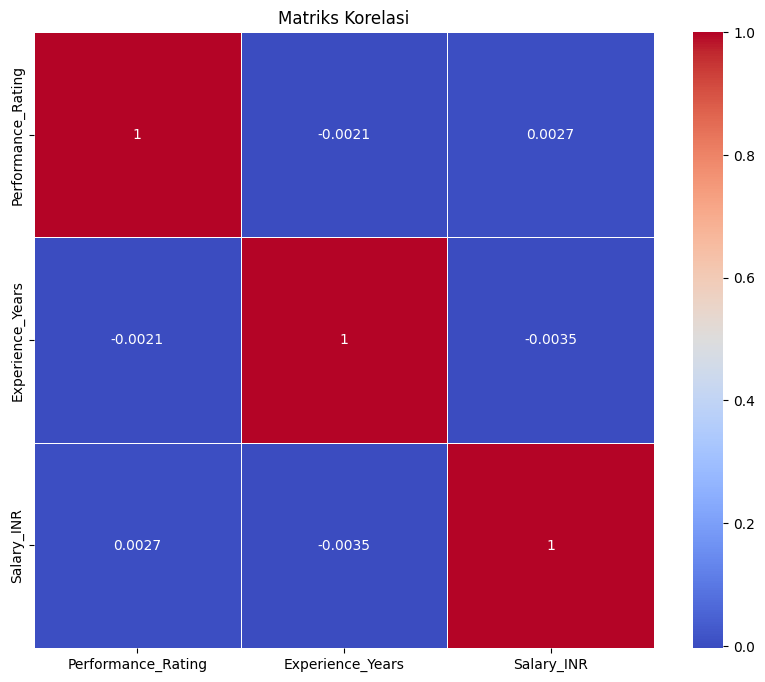

In [8]:
kolom_numerik = data.select_dtypes(include=['int64', 'float64'])

corr_matrix = kolom_numerik.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriks Korelasi')
plt.show

In [11]:
import plotly.express as px
# Department-wise employee count
dept_counts = data['Department'].value_counts().reset_index()
dept_counts.columns = ['Department', 'Employee_Count']

print("Employee Count by Department")
print(dept_counts)

# bar chart
fig = px.bar(
    dept_counts,
    x='Department',
    y='Employee_Count',
    text='Employee_Count',
    title='Employee Count by Department',
    color='Department'
)

fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title="Department",
    yaxis_title="Number of Employees",
    showlegend=False
)

fig.show()

Employee Count by Department
   Department  Employee_Count
0          IT           54208
1       Sales           36223
2  Operations           27358
3   Marketing           22020
4     Finance           18128
5          HR           14396
6         R&D            9022


In [12]:
avg_salary = data.groupby('Department')['Salary_INR'].mean().reset_index()
avg_salary.columns = ['Department', 'Average_Salary']

print("Average Salary per Department:")
print(avg_salary)

fig = px.bar(
    avg_salary,
    x="Department",
    y="Average_Salary",
    text='Average_Salary',
    title='Aaverage Salary per Department',
    color='Department'
)

fig.update_traces(texttemplate='₹%{text:,.0f}', textposition='outside')
fig.update_layout(
    xaxis_title="Department",
    yaxis_title="Average Salary (INR)",
    showlegend=False
)

fig.show()

Average Salary per Department:
   Department  Average_Salary
0     Finance    9.411327e+05
1          HR    7.415769e+05
2          IT    1.129683e+06
3   Marketing    7.702584e+05
4  Operations    7.566799e+05
5         R&D    7.967829e+05
6       Sales    7.942905e+05


In [13]:
workmode_counts = data['Work_Mode'].value_counts().reset_index()
workmode_counts.columns = ['Work_Mode', 'Employee_Count']

print("Work Mode Distribution of Employees:")
print(workmode_counts)

# pie chart
fig = px.pie(
    workmode_counts,
    names='Work_Mode',
    values='Employee_Count',
    title='Distribution of Employees by Work Mode',
    hole=0.4  # donut style
)

# Percentage labels
fig.update_traces(textinfo='percent+label')

fig.show()

Work Mode Distribution of Employees:
  Work_Mode  Employee_Count
0   On-site          108333
1    Remote           73021


In [15]:
status_counts = data['Status'].value_counts(normalize=True) * 100
status_counts = status_counts.reset_index()
status_counts.columns = ['Status', 'Percentage']

print("Active vs Resigned Employees (%):")
print(status_counts)

# pie chart
fig = px.pie(
    status_counts,
    names='Status',
    values='Percentage',
    title='Active vs Resigned Employees (%)',
    hole=0.3  # donut style
)

# Show percentage + label
fig.update_traces(textinfo='percent+label')

fig.show()

Active vs Resigned Employees (%):
       Status  Percentage
0      Active   70.054865
1    Resigned   19.888065
2     Retired    5.030465
3  Terminated    5.026054
4          Re    0.000551


In [18]:
location_counts = data['Location'].value_counts().reset_index()
location_counts.columns = ['Location', 'Employee_Count']

# top location
top_location = location_counts.iloc[0]
print(f"Location with the highest number of employees: {top_location['Location']} ({top_location['Employee_Count']} employees)")

# Show top 10 locations in bar chart
fig = px.bar(
    location_counts.head(10),
    x='Location',
    y='Employee_Count',
    text='Employee_Count',
    title='Top 10 Locations with Most Employees',
    color='Location'
)

fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title="Location (City, Country)",
    yaxis_title="Number of Employees",
    xaxis={'categoryorder':'total descending'},
    showlegend=False
)

fig.show()

Location with the highest number of employees: South Michael, Tunisia (6 employees)


In [19]:
resigned_df = data[data['Status'] == 'Resigned']

# Department-wise resigned employees
dept_resigned = resigned_df['Department'].value_counts().reset_index()
dept_resigned.columns = ['Department', 'Resigned_Count']

print("Department-wise Resigned Employees:")
print(dept_resigned)

fig1 = px.bar(
    dept_resigned,
    x='Department',
    y='Resigned_Count',
    text='Resigned_Count',
    title='Department-wise Resigned Employees',
    color='Department'
)
fig1.update_traces(textposition='outside')
fig1.update_layout(showlegend=False)
fig1.show()

Department-wise Resigned Employees:
   Department  Resigned_Count
0          IT           10689
1       Sales            7229
2  Operations            5414
3   Marketing            4382
4     Finance            3643
5          HR            2893
6         R&D            1818


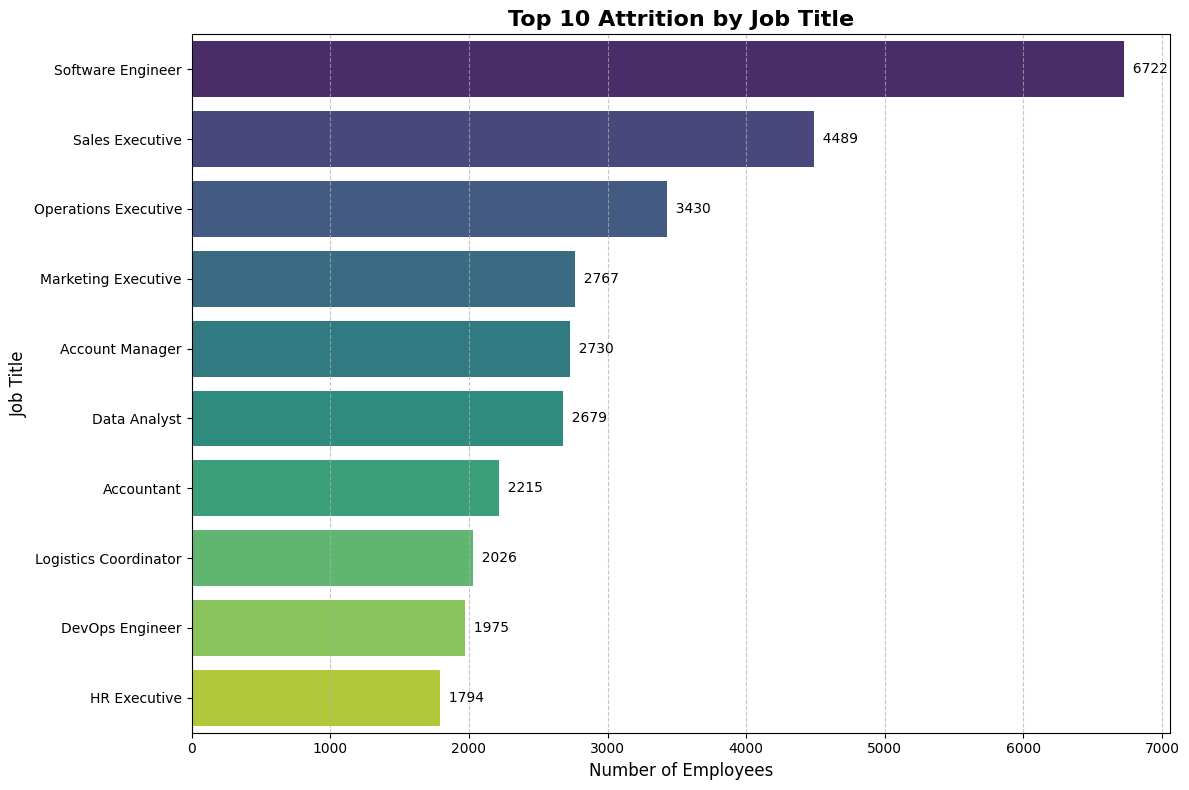

In [26]:
attrition_data = data[data['Status'].isin(['Resigned', 'Terminated'])]

attrition_count = attrition_data['Job_Title'].value_counts()

top10_attrition = attrition_count.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top10_attrition.values, y=top10_attrition.index, palette='viridis')

plt.title('Top 10 Attrition by Job Title', fontsize=16, fontweight='bold')
plt.xlabel('Number of Employees', fontsize=12)
plt.ylabel('Job Title', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

for index, value in enumerate(top10_attrition.values):
    plt.text(value, index, f'  {value}', va='center')

plt.tight_layout()
plt.show()

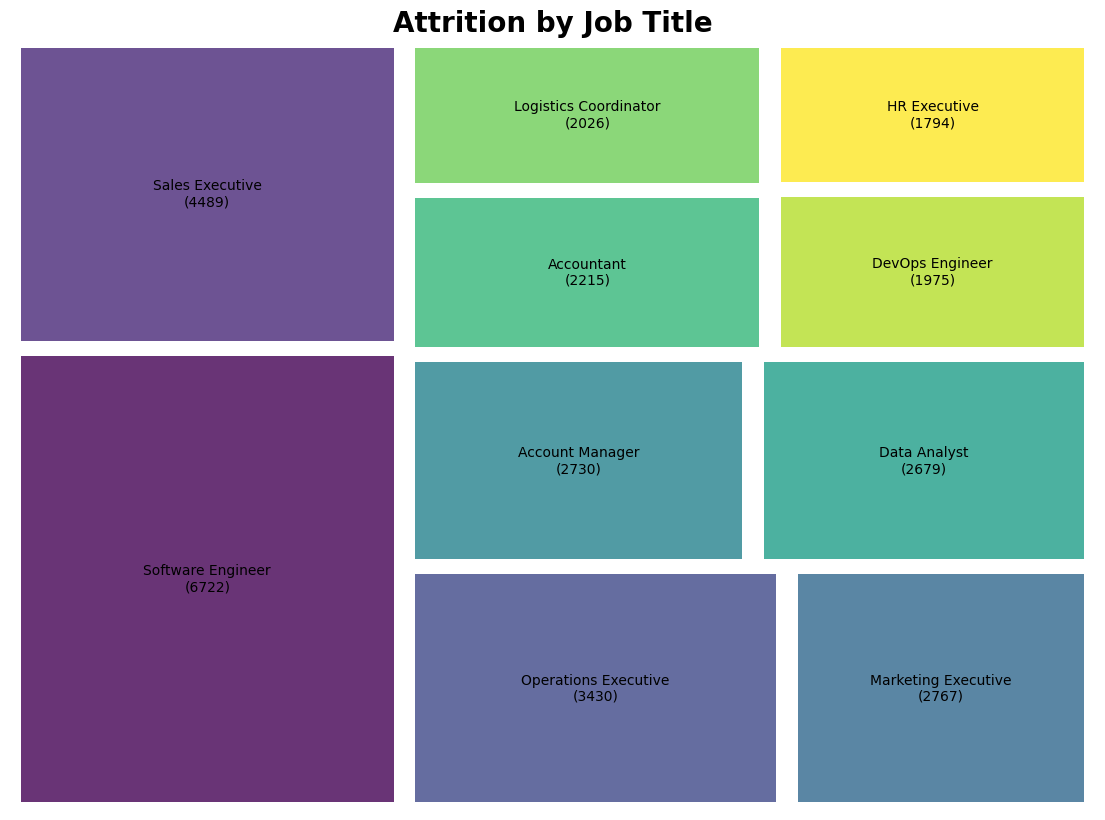

In [37]:
!pip install squarify
import squarify
sizes = top10_attrition.values.tolist()
labels = [f'{title}\n({count})' for title, count in top10_attrition.items()]
cmap = plt.get_cmap('viridis')
colors = [cmap(i / (len(sizes) - 1)) for i in range(len(sizes))]

plt.figure(figsize=(14, 10))
squarify.plot(
    sizes=sizes,
    label=labels,
    color=colors,
    alpha=0.8,
    pad=True
)
plt.title('Attrition by Job Title', fontsize=20, fontweight='bold')
plt.axis('off')
plt.show()

# Clustering

In [49]:
clustering_data = data.select_dtypes(include=['int64', 'float64'])
clustering_data['Salary_INR'].fillna(clustering_data['Salary_INR'].median(), inplace=True)


In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(clustering_data)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(X_scaled)

print("Number of employees in each cluster:")
print(data['Cluster'].value_counts())

Number of employees in each cluster:
Cluster
2    81389
1    76767
0    23199
Name: count, dtype: int64


In [56]:
cluster_profiles = data.groupby('Cluster')[['Salary_INR', 'Experience_Years', 'Performance_Rating']].mean()
print(cluster_profiles)

           Salary_INR  Experience_Years  Performance_Rating
Cluster                                                    
0        1.699042e+06          4.960084            3.020087
1        7.800311e+05          5.660127            1.744447
2        7.777487e+05          4.427171            4.179250


Berdasarkan nilai rata-rata yang telah dibuat, kita bisa memberikan makna pada setiap klaster:

**Klaster 0: Karyawan Berpengalaman & Bergaji Tinggi**
  - Karakteristik: Ini adalah kelompok dengan gaji tertinggi (rata-rata ₹1,69 juta) dan pengalaman paling tinggi (rata-rata 4,96 tahun). Rating kinerja mereka berada di level rata-rata (3.02).
  - Temuan: Kelompok ini kemungkinan besar terdiri dari para spesialis senior dan talenta kunci di perusahaan. Mereka adalah pilar dari organisasi, dan mempertahankan mereka harus menjadi prioritas utama.

**Klaster 1: Karyawan Berkinerja Rendah & Berpengalaman Sedang**

- Karakteristik: Kelompok ini memiliki gaji terendah (rata-rata ₹780 ribu) dan rating kinerja terburuk (1.74). Pengalaman mereka berada di tengah (rata-rata 5,66 tahun), yang menunjukkan bahwa mereka bukan karyawan baru.

- Temuan: Klaster ini bisa menjadi "talenta yang berisiko" atau "talenta yang underperform". Meskipun mereka memiliki pengalaman, kinerja mereka di bawah standar. Mereka mungkin tidak puas dengan kompensasi atau tidak memiliki keterampilan yang relevan.

**Klaster 2: Karyawan Berkinerja Tinggi & Gaji Standar**

- Karakteristik: Kelompok ini memiliki rating kinerja tertinggi (4.17) tetapi gaji rata-rata yang mirip dengan Klaster 1 (rata-rata ₹777 ribu). Pengalaman mereka paling sedikit (rata-rata 4,42 tahun).

- Temuan: Klaster ini kemungkinan besar adalah "bintang baru" yang sangat produktif tetapi mungkin merasa kompensasinya belum setara dengan kontribusi mereka. Mereka adalah kelompok yang berisiko tinggi untuk mengalami attrition jika tidak diperhatikan.


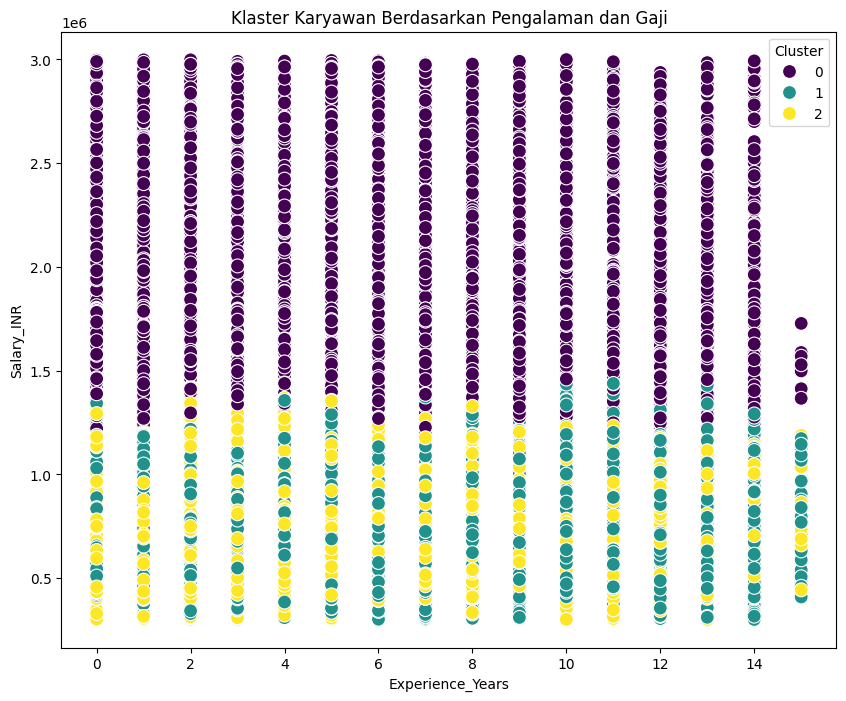

In [59]:
data_jitter = data.copy()
data_jitter['Experience_Years_Jittered'] = data_jitter['Experience_Years'] + np.random.uniform(-0.2, 0.2, size=len(data_jitter))

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Experience_Years',
    y='Salary_INR',
    hue='Cluster',
    data=data_jitter,
    palette='viridis',
    s=100
)
plt.title('Klaster Karyawan Berdasarkan Pengalaman dan Gaji')
plt.show()

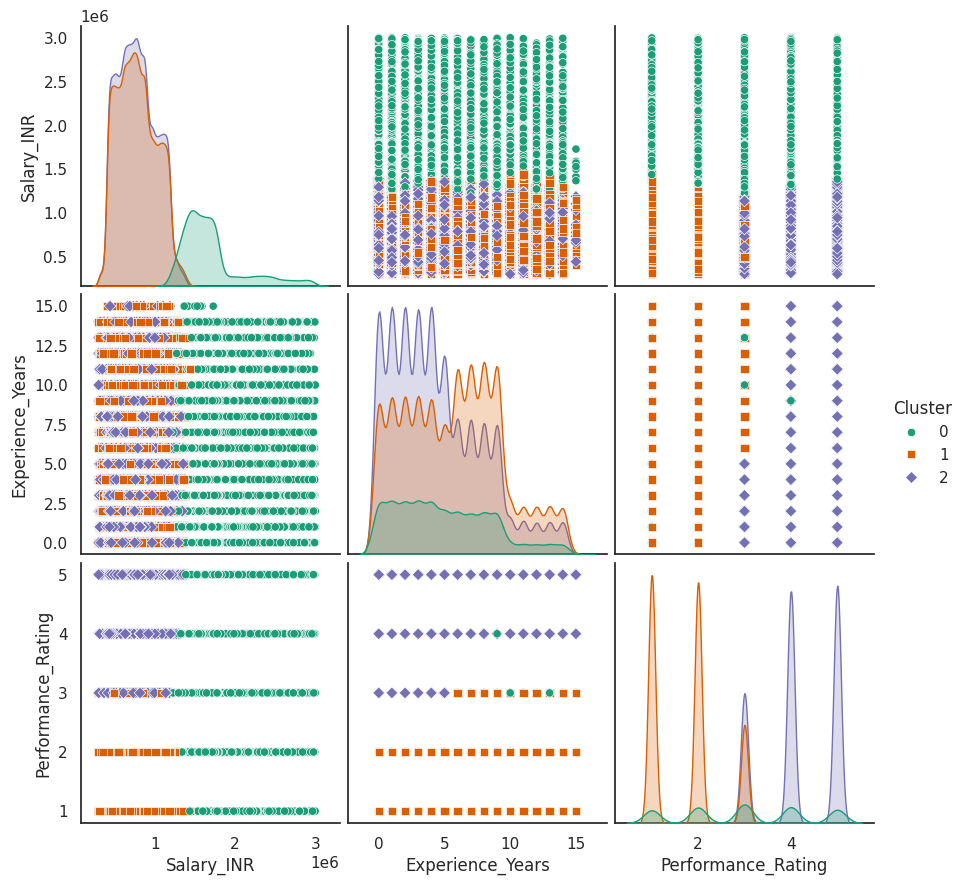

In [60]:
numeric_columns = [
    'Salary_INR', 'Experience_Years', 'Performance_Rating'
]


sns.set(style= "white")
pair_plot = sns.pairplot(
    data[numeric_columns + ['Cluster']],
    hue="Cluster",
    palette="Dark2",
    diag_kind="kde",
    markers=["o", "s", "D"],
    height=3
)

plt.show()

In [61]:
data.head()

,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR,Cluster
0,EMP0000001,Joshua Nguyen,IT,Software Engineer,2011-08-10,"Isaacland, Denmark",5,14,Resigned,On-site,1585363.0,0
1,EMP0000002,Julie Williams,Marketing,SEO Specialist,2018-03-02,"Anthonyside, Costa Rica",2,7,Active,On-site,847686.0,1
2,EMP0000003,Alyssa Martinez,HR,HR Manager,2023-03-20,"Port Christinaport, Saudi Arabia",1,2,Active,On-site,1430084.0,0
3,EMP0000004,Nicholas Valdez,IT,Software Engineer,2023-10-12,"Port Shelbychester, Antigua and Barbuda",1,1,Active,On-site,990689.0,1
4,EMP0000005,Joel Hendricks,Operations,Logistics Coordinator,2024-12-09,"Lake Kimberly, Palestinian Territory",5,0,Active,On-site,535082.0,2


In [62]:
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

cluster_analysis = data.groupby('Cluster')[numeric_columns].agg(['mean','min','max']).T

cluster_analysis


Cluster                             0             1             2
Performance_Rating mean  3.020087e+00  1.744447e+00  4.179250e+00
                   min   1.000000e+00  1.000000e+00  3.000000e+00
                   max   5.000000e+00  3.000000e+00  5.000000e+00
Experience_Years   mean  4.960084e+00  5.660127e+00  4.427171e+00
                   min   0.000000e+00  0.000000e+00  0.000000e+00
                   max   1.500000e+01  1.500000e+01  1.500000e+01
Salary_INR         mean  1.699042e+06  7.800311e+05  7.777487e+05
                   min   1.174824e+06  3.002550e+05  3.002600e+05
                   max   2.998506e+06  1.462445e+06  1.412281e+06